## Food Mama project: 

In [1]:
import pandas as pd
import mama
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the Datasets into Pandas dataframe

In [2]:
path = "datasets/"
files = os.listdir(path)

dfs = []
for file in files:
    filename = file.split("_")
    dfs.append(filename[0])
    exec(dfs[-1] + '= pd.read_csv(path + file)')

print("Name of the dataframes created: ", *dfs, sep="\n")

Name of the dataframes created: 
food
item
recipe


In [3]:
recipe.head()

,id,title,servings,ingredients,instructions,created_at,updated_at,recommendable,status,origin,link,rating
0,9,"Salade mâche, jambon de Bayonne, mozzarella",4,4 bonne poignée de mâche \r\n40 tomate cerise ...,"Après avoir coupé en dés la mozzarella, couper...",2017-12-14 14:56:37.166524,2018-10-05 09:16:42.390163,NaN,dismissed,www.marmiton.org,http://www.marmiton.org/recettes/recette_salad...,limit
1,10,Ciabattina al pesto,1,Ciabattina\r\nJambon de Parme\r\nTomates confi...,Ouvrir le pain Ciabattina en deux et tartiner ...,2017-12-14 14:56:46.270433,2018-10-05 09:16:42.45289,NaN,dismissed,www.club-sandwich.net,http://www.club-sandwich.net/mobile/fiche.php?...,limit
2,402,Tortilla aux champignons et salade,4,250 g de champignons de Paris\r\r\n4 oeufs\r\r...,Préchauffer le four à 180 °C (th. 6).\r\nCoupe...,2017-12-15 16:41:37.056079,2018-10-05 09:16:42.505825,NaN,dismissed,www.mangerbouger.fr,http://www.mangerbouger.fr/Manger-Mieux/Recett...,limit
3,2,Steak haché et pâtes,1,2.0 filets huile d'olive\r\n1.0 steak haché\...,"Dans une casserole, portez à ébullition un gra...",2017-12-13 16:17:24.125137,2018-10-05 09:16:42.55582,NaN,dismissed,www.wecook.fr,https://www.wecook.fr/recette/steak-hache-et-p...,good
4,4,Beef Bagel,1,Pain Bagel\r\nCarpaccio de boeuf\r\nFromage fr...,Placer les tranches de carpaccio dans un plat ...,2017-12-13 17:13:29.069001,2018-10-05 09:16:42.597349,NaN,dismissed,www.club-sandwich.net,http://www.club-sandwich.net/mobile/fiche.php?...,limit


### Run `preprocessing` module to modify and to clean the dataframes (drop unnecessary columns, rename columns, replace index with "id", fill the missing data, and change data type).

In [4]:
dataframes = [food, item, recipe]
foods, items, recipes = mama.preprocessing(dataframes)
items.head()

,recipe-ingredient,name_food,title_recipe,ingredients_recipe,origin_recipe
id,,,,,
1,2.0 filets huile d'olive,huile d'olive,Steak haché et pâtes,2.0 filets huile d'olive\r\n1.0 steak haché\...,www.wecook.fr
2,1.0 steak haché,steak haché,Steak haché et pâtes,2.0 filets huile d'olive\r\n1.0 steak haché\...,www.wecook.fr
3,70.0 grammes pâtes,pâtes,Steak haché et pâtes,2.0 filets huile d'olive\r\n1.0 steak haché\...,www.wecook.fr
4,500 g de semoule moyenne,semoule,Taboulé ultra-facile,500 g de semoule moyenne \r\n500 g de tomate e...,www.marmiton.org
5,500 g de tomate environ (ébouillantées pour ot...,tomate,Taboulé ultra-facile,500 g de semoule moyenne \r\n500 g de tomate e...,www.marmiton.org


### Merging tables to create a meta_data table

In [5]:
merge_table = pd.merge(recipes, items, left_on='title', right_on='title_recipe')
merge_table = merge_table.loc[:, ['recipe_id', 'title', 'servings', 'origin', 'rating', 'name_food']]
merge_table.head(10)

,recipe_id,title,servings,origin,rating,name_food
0,9,"Salade mâche, jambon de Bayonne, mozzarella",4,www.marmiton.org,limit,mâche
1,9,"Salade mâche, jambon de Bayonne, mozzarella",4,www.marmiton.org,limit,tomate cerise
2,9,"Salade mâche, jambon de Bayonne, mozzarella",4,www.marmiton.org,limit,mozzarella
3,9,"Salade mâche, jambon de Bayonne, mozzarella",4,www.marmiton.org,limit,jambon cru
4,9,"Salade mâche, jambon de Bayonne, mozzarella",4,www.marmiton.org,limit,croutons
5,9,"Salade mâche, jambon de Bayonne, mozzarella",4,www.marmiton.org,limit,vinaigrette
6,10,Ciabattina al pesto,1,www.club-sandwich.net,limit,pain ciabattina
7,10,Ciabattina al pesto,1,www.club-sandwich.net,limit,jambon de Parme
8,10,Ciabattina al pesto,1,www.club-sandwich.net,limit,tomate confite
9,10,Ciabattina al pesto,1,www.club-sandwich.net,limit,pesto


In [6]:
meta_data = pd.merge(merge_table, foods, left_on='name_food', right_on='name')
meta_data.head(10)

,recipe_id,title,servings,origin,rating,name_food,food_id,name,availability,category_id,ancestry
0,9,"Salade mâche, jambon de Bayonne, mozzarella",4,www.marmiton.org,limit,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86
1,566,Sandwich Spécial Magy,1,www.club-sandwich.net,limit,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86
2,397,Salade de ravioles,2,www.mangerbouger.fr,good,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86
3,508,Sandwich Marcilhacy's,1,www.club-sandwich.net,limit,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86
4,564,Sandwich Rösti Burger,1,www.club-sandwich.net,limit,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86
5,391,Salade fraîcheur,4,www.mangerbouger.fr,good,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86
6,1213,"Haricots rouges, maïs, tomate, champignon, mâc...",1,clementale_,good,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86
7,1113,"Saumon fumé, avocat, mâche, riz, vinaigrette, ...",1,mama,good,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86
8,476,Parmentier de canard et salade verte,6,www.mangerbouger.fr,limit,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86
9,551,Bruschetta Mâche/Parmesan,1,www.club-sandwich.net,good,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86


### Convert categorical data to numerical data

- Approach #1 - Find and Replace

In [7]:
rating_cat = {"rating": {"avoid": 1, "limit": 2, "good": 3, "excellent": 4, "unknown": 0}}
meta_data.replace(rating_cat, inplace=True)

- Approach #2 - Label Encoding

In [8]:
meta_data.availability = meta_data.availability.astype('category')
meta_data["availability_cat"] = meta_data.availability.cat.codes

- Approach #3 - Use Scikit-Learn

In [9]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
meta_data["origin_id"] = lb_make.fit_transform(meta_data["origin"])
meta_data.head(10)

,recipe_id,title,servings,origin,rating,name_food,food_id,name,availability,category_id,ancestry,availability_cat,origin_id
0,9,"Salade mâche, jambon de Bayonne, mozzarella",4,www.marmiton.org,2,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86,0,70
1,566,Sandwich Spécial Magy,1,www.club-sandwich.net,2,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86,0,67
2,397,Salade de ravioles,2,www.mangerbouger.fr,3,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86,0,69
3,508,Sandwich Marcilhacy's,1,www.club-sandwich.net,2,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86,0,67
4,564,Sandwich Rösti Burger,1,www.club-sandwich.net,2,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86,0,67
5,391,Salade fraîcheur,4,www.mangerbouger.fr,3,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86,0,69
6,1213,"Haricots rouges, maïs, tomate, champignon, mâc...",1,clementale_,3,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86,0,10
7,1113,"Saumon fumé, avocat, mâche, riz, vinaigrette, ...",1,mama,3,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86,0,42
8,476,Parmentier de canard et salade verte,6,www.mangerbouger.fr,2,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86,0,69
9,551,Bruschetta Mâche/Parmesan,1,www.club-sandwich.net,3,mâche,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86,0,67


### Preparing a dataframe `cluster_data` for Unsupervised Learning

In [10]:
cluster_data = meta_data.loc[:, ['title', 'recipe_id', 'servings', 'origin_id', 'rating', 'food_id', 'category_id', 'availability_cat', 'ancestry']]
cluster_data.rename(columns={'title':'recipe_title', 'food_id':'ingredient_id', 'category_id':'ingredient_cat'}, inplace=True)
cluster_data.head(10)

,recipe_title,recipe_id,servings,origin_id,rating,ingredient_id,ingredient_cat,availability_cat,ancestry
0,"Salade mâche, jambon de Bayonne, mozzarella",9,4,70,2,42,14,0,86
1,Sandwich Spécial Magy,566,1,67,2,42,14,0,86
2,Salade de ravioles,397,2,69,3,42,14,0,86
3,Sandwich Marcilhacy's,508,1,67,2,42,14,0,86
4,Sandwich Rösti Burger,564,1,67,2,42,14,0,86
5,Salade fraîcheur,391,4,69,3,42,14,0,86
6,"Haricots rouges, maïs, tomate, champignon, mâc...",1213,1,10,3,42,14,0,86
7,"Saumon fumé, avocat, mâche, riz, vinaigrette, ...",1113,1,42,3,42,14,0,86
8,Parmentier de canard et salade verte,476,6,69,2,42,14,0,86
9,Bruschetta Mâche/Parmesan,551,1,67,3,42,14,0,86


In [11]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8464 entries, 0 to 8463
Data columns (total 9 columns):
recipe_title        8464 non-null object
recipe_id           8464 non-null int64
servings            8464 non-null int64
origin_id           8464 non-null int64
rating              8464 non-null int64
ingredient_id       8464 non-null int64
ingredient_cat      8464 non-null int64
availability_cat    8464 non-null int8
ancestry            8464 non-null int64
dtypes: int64(7), int8(1), object(1)
memory usage: 603.4+ KB


### K-Means Clustering

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(algorithm='auto', n_clusters=4, max_iter=100, random_state=0)
X = cluster_data.drop("recipe_title", axis=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [13]:
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

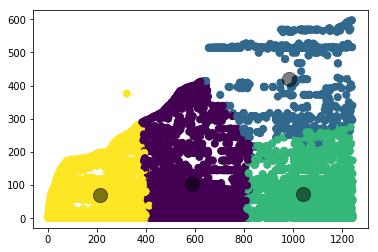

In [15]:
plt.scatter(X.recipe_id, X.ingredient_id, c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 4], c='black', s=200, alpha=0.5)
plt.show()